#### Task 4 SMS Classifiation 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re  
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Task 4 Data/spam.csv", encoding="latin-1")
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.columns=["kind", "Message"]
df

,kind,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.describe()

,kind,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   kind     5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
stop_words = set(stopwords.words('english'))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["CleanMessage"] = df["Message"].apply(cleaning_data)

In [7]:
df

,kind,Message,CleanMessage
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact pound prize claim easy call...
5568,ham,Will Ì_ b going to esplanade fr home?,going esplanade home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["CleanMessage"])

Y =df['kind'].apply(lambda x: 1 if x=='ham' else 0)

In [9]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: kind, Length: 5572, dtype: int64

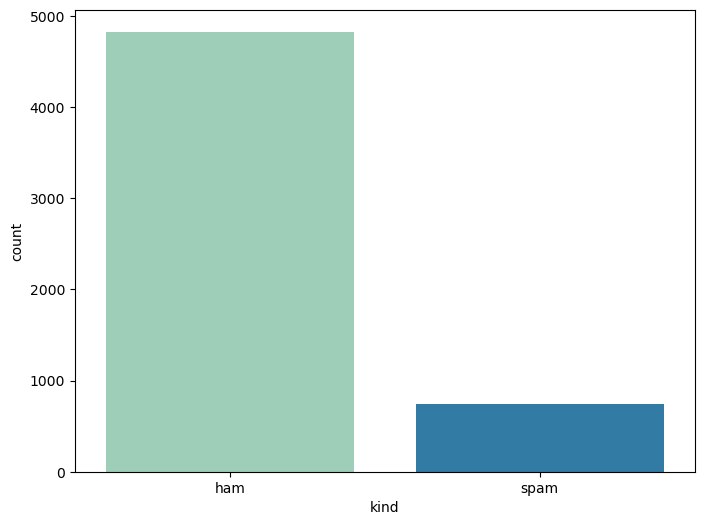

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x="kind", data=df, palette="YlGnBu")
plt.show()


In [11]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
NBmodel = MultinomialNB()
NBmodel.fit(X_train,Y_train)
y_pred = NBmodel.predict(X_test)
accuracy_score(Y_test, y_pred)

0.9632286995515695

In [13]:
LRmodel=LogisticRegression()
LRmodel.fit(X_train,Y_train)
y_pred = LRmodel.predict(X_test)
accuracy_score(Y_test, y_pred)

0.9479820627802691

In [14]:
emails = [
    'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = vectorizer.transform(emails)

In [15]:
NBmodel.predict(emails_count)

array([1, 1], dtype=int64)

In [16]:
LRmodel.predict(emails_count)

array([1, 1], dtype=int64)